In [2]:
digit_mnist=keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [11]:
X_test.shape

(10000, 28, 28, 1)

In [7]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

In [12]:
X_test.shape

(10000, 28, 28, 1)

In [8]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.


In [9]:
X_valid, X_train = X_train_n[0:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[0:6000], y_train_full[6000:]

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model_A=keras.models.Sequential()
model_A.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model_A.add(keras.layers.MaxPooling2D(2,2))

model_A.add(keras.layers.Flatten())

model_A.add(keras.layers.Dense(200,activation="relu"))
model_A.add(keras.layers.Dense(100,activation="relu"))
model_A.add(keras.layers.Dense(10,activation="softmax"))

model_A.summary

In [ ]:
model_A.summary()

In [17]:
model_A.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [ ]:
model_A_history=model_A.fit(X_train,y_train,epochs=60,batch_size=64,validation_data=(X_valid,y_valid))

In [19]:
X_new=X_test[0:3]

In [23]:
y_prob=model_A.predict(X_new)

1/1 [==============================] - 0s 20ms/step


In [24]:
y_pred=np.argmax(y_pred,axis=1)

In [25]:
y_pred

array([7, 2, 1], dtype=int64)

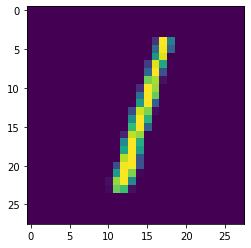

In [31]:
plt.imshow(X_new[2])